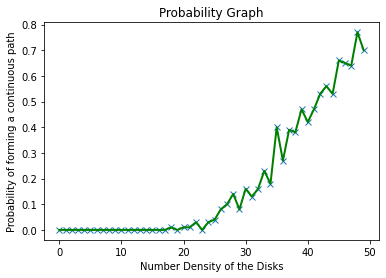

In [1]:
#Son-Gyo Jung; Tutor Group F; Code Script 2
import numpy.random as nr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl


#list and matrix to store data
disks = 50
test = 100
probability_data = np.zeros((disks,2))

for i in range(disks):
    probability_data[i][0] = i

    
def joincluster(c1, c2, raw_clusters):
    """
    Joining raw_clusters into bigger clusters   
    """
    for c in raw_clusters[c2]:
        if c in raw_clusters[c1]:
            raw_clusters[c1] += raw_clusters[c2]
            raw_clusters[c2] = []
                
    
def findclusters(n, radius, d):
    #Random coordinates generator
    random = nr.uniform(size=(n,d))

    #List of disks numbers that form a cluster
    raw_clusters = []

    for p1 in range(n):
        for p2 in range((p1+1),n):              
            Cx = random[p1][0] - random[p2][0]
            Cy = random[p1][1] - random[p2][1]

            if d is 3:
                Cz = random[p1][2] - random[p2][2]
                distance = np.sqrt(Cx*Cx + Cy*Cy + Cz*Cz)

            distance = np.sqrt(Cx*Cx + Cy*Cy)

            if distance <= radius*2.0 and distance !=0.0:
                if ([p1,p2]) and ([p2,p1]) not in raw_clusters:
                    raw_clusters.append([p1,p2])

    #List of disks touching x=0
    left = []

    for p1 in range(n):
        left_x = random[p1][0]

        if left_x <= radius:
            left.append(p1)


    #List of disks touching x=1
    right = [] 
    for p1 in range(n):
        right_x = 1.0 - random[p1][0]
        if right_x <= radius:
            right.append(p1)
            
        
    for i in range(len(raw_clusters)):
        for j in range(len(raw_clusters)):
            if i!=j:
                joincluster(i, j, raw_clusters)


    merged_clusters=[]      

    raw_clusters=[x for x in raw_clusters if x != []]
    for i in range(len(raw_clusters)):
        merged_clusters.append(list(set(raw_clusters[i])))           


    #Coordinates of merged_clusters into the library
    clist = []

    for i in range(len(merged_clusters)):
        clist.append({'DiskID':merged_clusters[i], 'touch_left':'False', 'touch_right':'False'})


    #Checking if it touches x=0
    for i in range(len(clist)):
        for j in range(len(clist[i]['DiskID'])):
            if clist[i]['DiskID'][j] in left:
                clist[i]['touch_left']='True'


    #Checking if it touches x=1
    for i in range(len(clist)):
        for j in range(len(clist[i]['DiskID'])):
            if clist[i]['DiskID'][j] in right:
                clist[i]['touch_right']='True'
                
    
    #Collecting data for the probability graph 
    for k in range(len(clist)):
        if clist[k]['touch_left']=='True' and clist[k]['touch_right']=='True':
            probability_data[number_of_disks][1] = 1.0 + probability_data[number_of_disks][1]


for number_of_test in range(test):    
    for number_of_disks in range(disks):
        findclusters(number_of_disks, 0.10, 2)
        

x = probability_data[:, 0]
y = probability_data[:, 1]/test


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    
    return y_smooth


pl.title('Probability Graph')
plt.ylabel('Probability of forming a continuous path')
plt.xlabel('Number Density of the Disks')
plt.plot(x, y,'x')
plt.plot(x, smooth(y,1), 'g-', lw=2)
plt.show()
